In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics.pairwise import cosine_similarity

from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
## loading bthe data set
df=pd.read_csv('spotifyFeatures3.csv')

In [3]:
## Checking the data
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,04-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,04-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,05-Apr,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,04-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,04-Apr,0.390


# EDA & Data Visualization

In [4]:
## checking the data type
df.shape

(38188, 18)

In [5]:
## checking for data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38188 entries, 0 to 38187
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             38188 non-null  object 
 1   artist_name       38188 non-null  object 
 2   track_name        38188 non-null  object 
 3   track_id          38188 non-null  object 
 4   popularity        38188 non-null  int64  
 5   acousticness      38188 non-null  float64
 6   danceability      38188 non-null  float64
 7   duration_ms       38188 non-null  int64  
 8   energy            38188 non-null  float64
 9   instrumentalness  38188 non-null  float64
 10  key               38188 non-null  object 
 11  liveness          38188 non-null  float64
 12  loudness          38188 non-null  float64
 13  mode              38188 non-null  object 
 14  speechiness       38188 non-null  float64
 15  tempo             38188 non-null  float64
 16  time_signature    38188 non-null  object

In [6]:
## checking for the null value
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [7]:
## Checking the distribution of the numerical columns
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,38188.000000,38188.000000,38188.000000,3.818800e+04,38188.000000,38188.000000,38188.000000,38188.000000,38188.000000,38188.000000,38188.000000
mean,44.268854,0.369646,0.584273,2.317521e+05,0.578154,0.122130,0.221072,-9.331146,0.143205,117.071720,0.478881
std,20.262017,0.349679,0.186307,1.050304e+05,0.254600,0.281264,0.208310,5.808164,0.209075,31.227018,0.260574
min,0.000000,0.000001,0.058100,1.676000e+04,0.000234,0.000000,0.009670,-47.046000,0.022400,32.244000,0.000000
25%,32.000000,0.048300,0.470000,1.822400e+05,0.410000,0.000000,0.097200,-11.315000,0.038600,92.009000,0.266000
50%,45.000000,0.238000,0.604000,2.182935e+05,0.616000,0.000010,0.129000,-7.515500,0.056500,114.040000,0.478000
75%,60.000000,0.713000,0.724000,2.607690e+05,0.781000,0.007777,0.268000,-5.442000,0.141000,138.806500,0.689000
max,100.000000,0.996000,0.980000,3.631469e+06,0.999000,0.997000,1.000000,1.023000,0.965000,236.735000,1.000000


In [8]:
df=df.rename(columns={'track_name':'Song_name',})

In [9]:
df.head()

,genre,artist_name,Song_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,04-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,04-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,05-Apr,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,04-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,04-Apr,0.390


In [10]:
df1=df.drop(['key','time_signature'],axis=1)

In [11]:
df1.head()

,genre,artist_name,Song_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,Major,0.0525,166.969,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,Major,0.0395,171.758,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,Major,0.0456,140.576,0.390


In [12]:
## Dropping this duplicate
df1.duplicated(subset=['artist_name','Song_name'],keep='last').sum()
df2=df1.drop_duplicates(subset=['artist_name','Song_name'],keep='last')

In [13]:
df2.shape

(35087, 16)

In [14]:
## checking for the genere
df2['genre'].value_counts()

Reggae              3185
Reggaeton           2605
Jazz                2428
Country             2350
Comedy              2203
Opera               2068
Hip-Hop             1972
Pop                 1681
Indie               1662
Rap                 1592
Ska                 1322
Soundtrack          1295
Children's Music    1242
Anime               1171
Dance               1139
Alternative         1133
Blues               1095
Classical           1046
Soul                 901
World                611
Rock                 561
Electronic           495
R&B                  464
Movie                386
Folk                 361
A Capella            119
Name: genre, dtype: int64

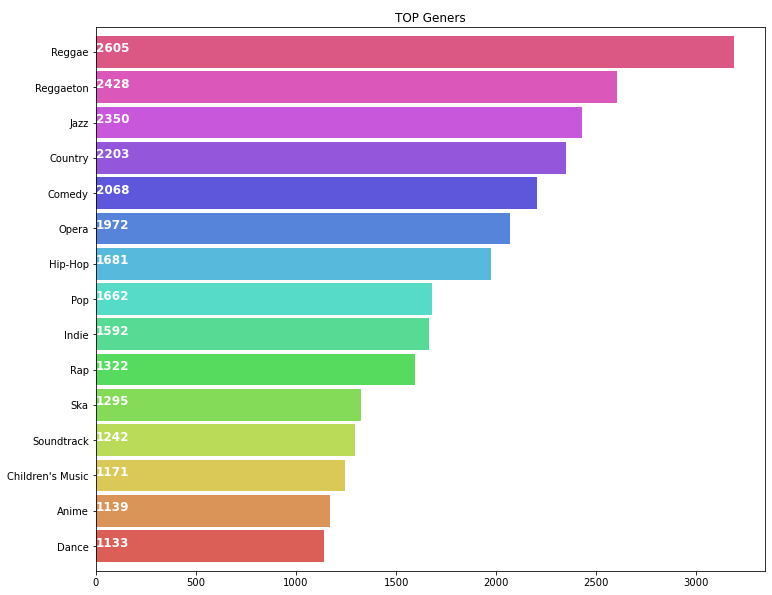

In [15]:
## Top 15 geners
plt.subplots(figsize=(12,10))
a=[]
for i in df2['genre']:
    a.append(i)
am=pd.Series(a).value_counts()[0:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',15))
for i,v in enumerate(pd.Series(a).value_counts()[0:16].sort_values(ascending=True).values):
     am.text(.8,i,v,fontsize=12,color='white',weight='bold')
plt.title("TOP Geners")
plt.show()

### From above observation we can said that the comedy and soundtrsck have more numbers of song as comapre to the others genere.
### Soul and world genere have shows less song counts.

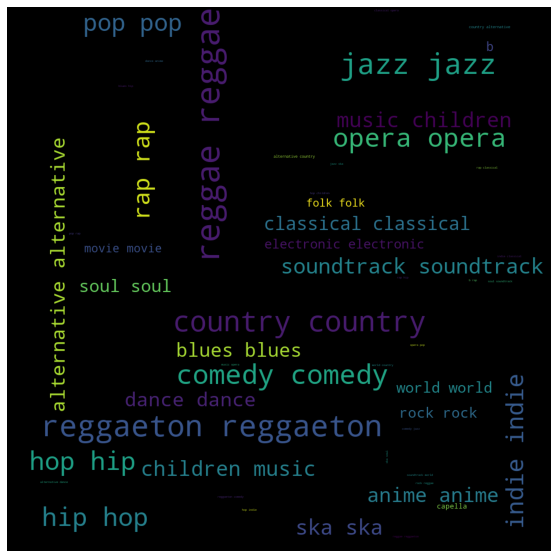

In [16]:
## checking for the duplicates
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
word=[]
for i in df2['genre']:
    word.append(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [17]:
## checking for the artists name
df1['artist_name'].value_counts()

Kimbo Children's Music      528
Giuseppe Verdi              279
Gioachino Rossini           220
Drake                       212
Giacomo Puccini             209
                           ... 
Ernest Reyer                  1
Giuseppe Giordani             1
Giuseppe Persiani             1
Giuseppe Maria Orlandini      1
Racket County                 1
Name: artist_name, Length: 6766, dtype: int64

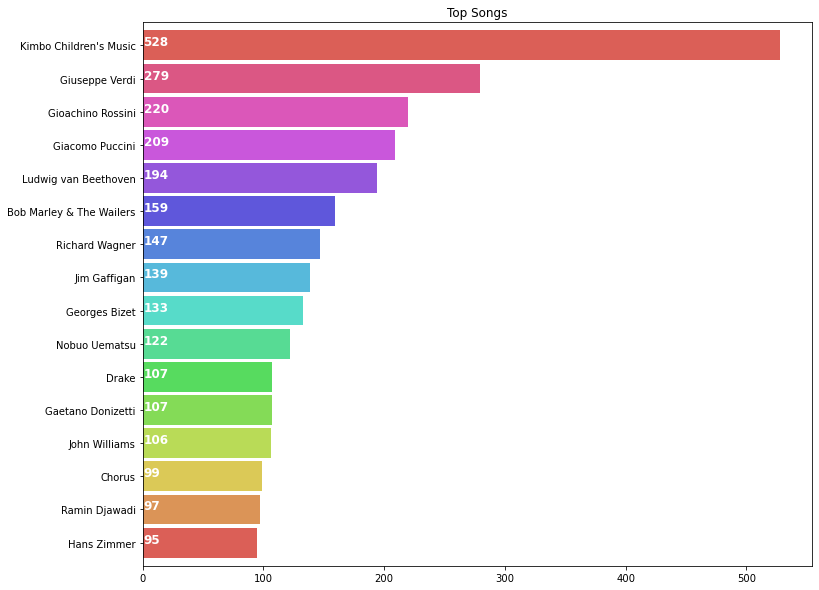

In [18]:
## Top 15 artists name
plt.subplots(figsize=(12,10))
A=[]
for i in df2['artist_name']:
    A.append(i)
ab=pd.Series(A).value_counts()[0:16].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',15))
for i,v in enumerate(pd.Series(A).value_counts()[:16].sort_values(ascending=True).values):
    ab.text(.8,i,v,fontsize=12,color='white',weight='bold')
plt.title('Top Songs')
plt.show()

### From above observation show that giuesepe verdi and giacomo puccini have large number of songs than other artist.while Howard shore Drake have less song counts


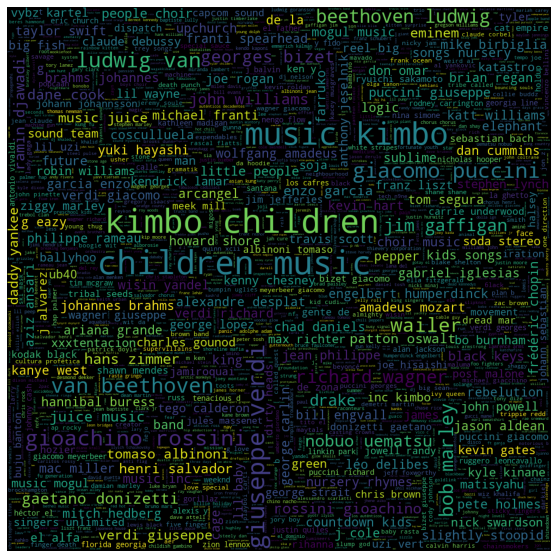

In [19]:
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
word=[]
for i in df2['artist_name']:
    word.append(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [20]:
## Checking the distribution of the numerical columns
df2.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,35087.000000,35087.000000,35087.000000,3.508700e+04,35087.000000,35087.000000,35087.000000,35087.000000,35087.000000,35087.000000,35087.000000
mean,42.344544,0.380594,0.578062,2.321549e+05,0.576144,0.130482,0.224400,-9.509488,0.143441,116.771199,0.480681
std,19.909206,0.353891,0.187795,1.083066e+05,0.259835,0.289707,0.212796,5.955571,0.214811,31.354616,0.263464
min,0.000000,0.000001,0.058100,1.676000e+04,0.000234,0.000000,0.009670,-47.046000,0.022400,32.244000,0.000000
25%,31.000000,0.050500,0.462000,1.811095e+05,0.402000,0.000000,0.097100,-11.693000,0.038500,91.903500,0.264000
50%,43.000000,0.252000,0.599000,2.179920e+05,0.616000,0.000013,0.129000,-7.623000,0.055300,113.580000,0.482000
75%,57.000000,0.740500,0.719000,2.614400e+05,0.786000,0.011600,0.273000,-5.466500,0.133000,138.094500,0.694000
max,100.000000,0.996000,0.980000,3.631469e+06,0.999000,0.997000,1.000000,1.023000,0.965000,236.735000,1.000000


## From above observation we can clearly conclude that 
## 1) Energy and valence are more related it means the eneriged songs are more positive
## 2)Danacability and valance also shows same relation.
## 3)Enerized song are also more loud and dancing songs have more time duration.

   ## Let's Explore further data

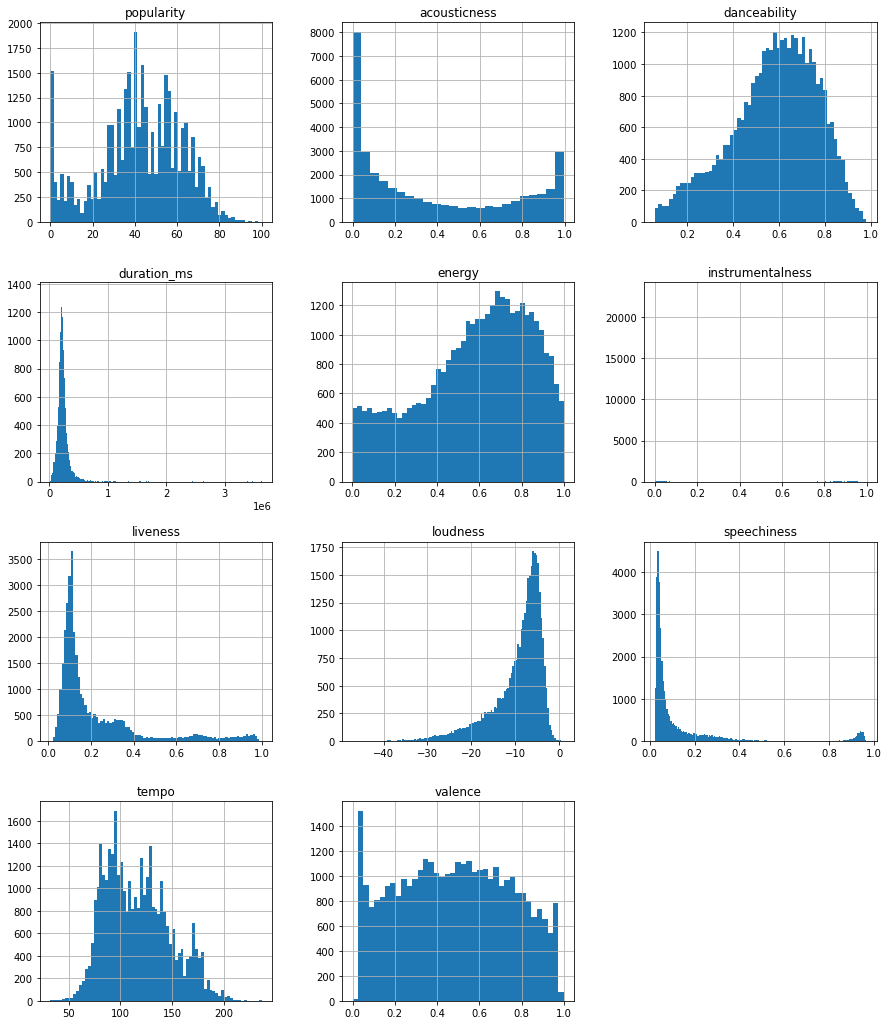

In [21]:
## Let's explore the distribution of the data using visualization
df2.hist(figsize=(15,18),bins='auto');

## From above observation Tempo,popularity,accoustiness,dancability,valence are looking normally distributed but we need to further investigate outliers using boxplots.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '7 rings'),
  Text(1, 0, 'Wow.'),
  Text(2, 0, "break up with your girlfriend, i'm bored"),
  Text(3, 0, 'Con Calma'),
  Text(4, 0, 'Sweet but Psycho'),
  Text(5, 0, 'Dancing With A Stranger (with Normani)'),
  Text(6, 0, 'Sunflower - Spider-Man: Into the Spider-Verse'),
  Text(7, 0, 'Calma - Remix'),
  Text(8, 0, 'MIDDLE CHILD'),
  Text(9, 0, 'Taki Taki (with Selena Gomez, Ozuna & Cardi B)'),
  Text(10, 0, 'High Hopes'),
  Text(11, 0, 'Going Bad (feat. Drake)'),
  Text(12, 0, 'thank u, next'),
  Text(13, 0, 'Sucker'),
  Text(14, 0, "i'm so tired..."),
  Text(15, 0, "Giant (with Rag'n'Bone Man)"),
  Text(16, 0, 'SICKO MODE'),
  Text(17, 0, 'ZEZE (feat. Travis Scott & Offset)'),
  Text(18, 0, 'Better Now'),
  Text(19, 0, 'a lot')])

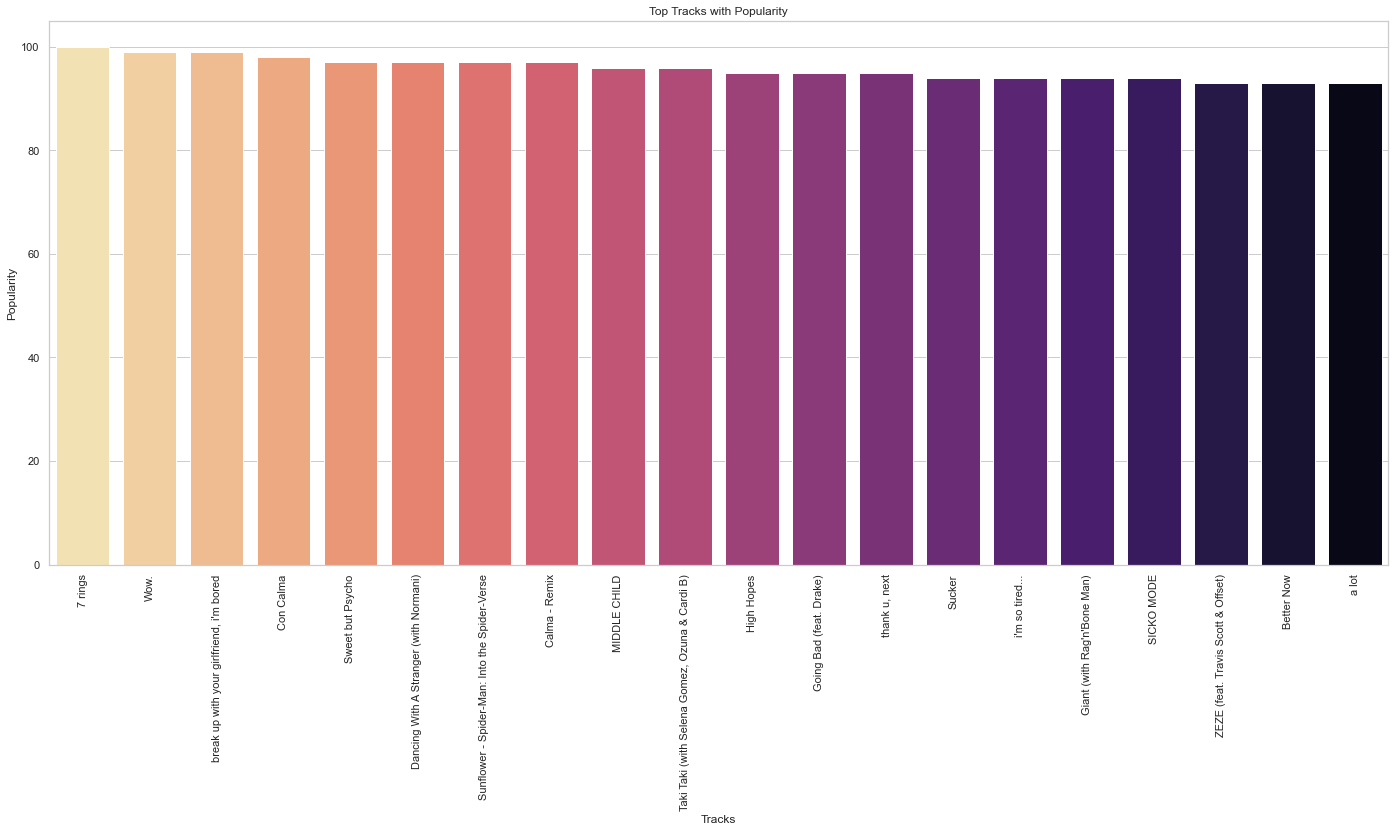

In [22]:
## Top 20 songs with popularity
plt.figure(figsize=(24, 10))
sns.set(style="whitegrid")
x = df2.groupby("Song_name")["popularity"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x, palette='magma_r')
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

### From above observation we conclude that song name 7 innings is most poular song with the popularity of 100,followed by the song wow with the popularity 98.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Pedro Capó'),
  Text(1, 0, 'Mau y Ricky'),
  Text(2, 0, 'Sebastian Yatra'),
  Text(3, 0, 'Piso 21'),
  Text(4, 0, 'Silk City'),
  Text(5, 0, 'ChocQuibTown'),
  Text(6, 0, 'Mario Bautista'),
  Text(7, 0, 'a-ha'),
  Text(8, 0, 'Manuel Turizo'),
  Text(9, 0, 'Martin Garrix'),
  Text(10, 0, 'Calum Scott'),
  Text(11, 0, 'Zac Efron'),
  Text(12, 0, 'Lukas Graham'),
  Text(13, 0, 'benny blanco'),
  Text(14, 0, 'Thalía'),
  Text(15, 0, 'Sofia Reyes'),
  Text(16, 0, 'Nacho'),
  Text(17, 0, 'Kris Kross Amsterdam'),
  Text(18, 0, 'Marc Anthony'),
  Text(19, 0, 'SHAUN')])

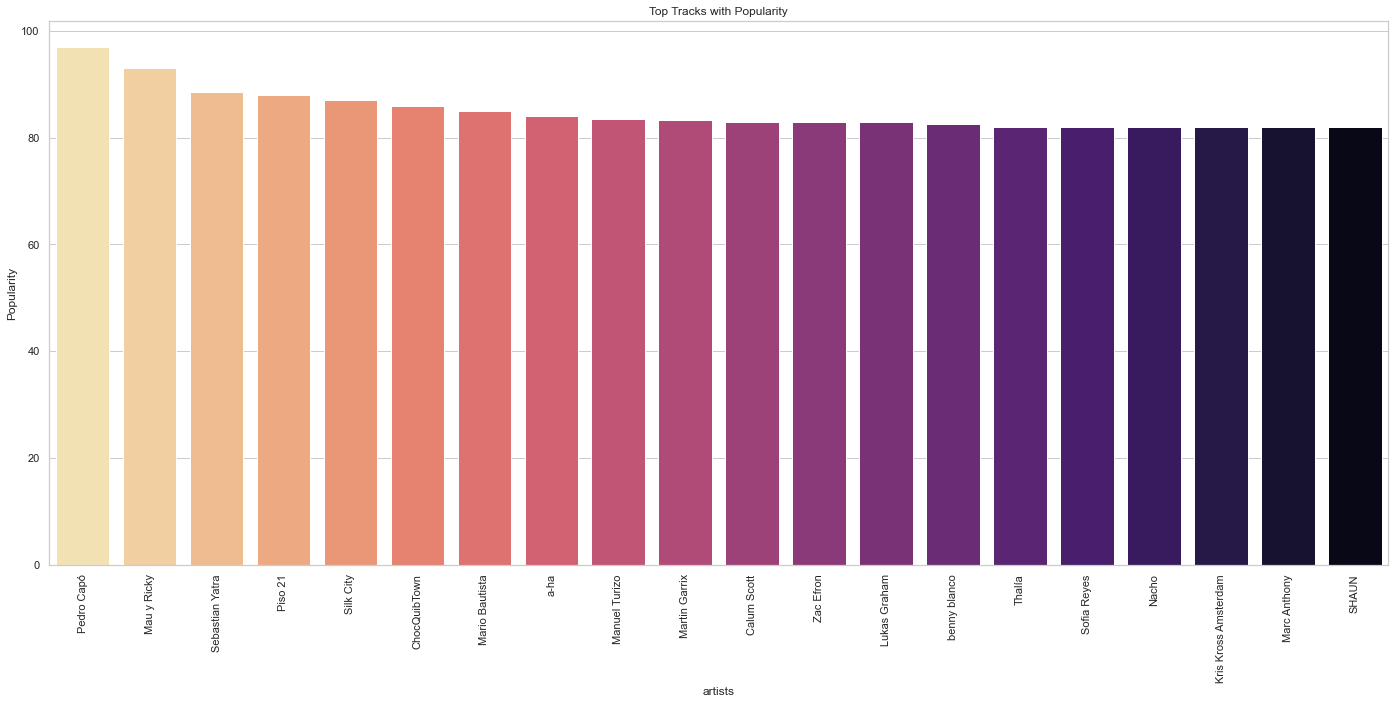

In [23]:
## Top 20 artists with popularity
plt.figure(figsize=(24, 10))
sns.set(style="whitegrid")
x = df2.groupby("artist_name")["popularity"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x, palette='magma_r')
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('artists')
plt.xticks(rotation = 90)

### From above observation we conclude that the artists name Pedro Capo and Mario Bautista have more popular song with 85 popularity.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Chanel (feat. Swae Lee & Pharrell) - From Jxmtro'),
  Text(1, 0, 'Soul Rebel - Afrodisiac Soundsystem Remix'),
  Text(2, 0, 'UP LIKE AN INSOMNIAC - Freestyle'),
  Text(3, 0, 'Danger'),
  Text(4, 0, 'Ice Ice Baby'),
  Text(5, 0, 'School Quiz'),
  Text(6, 0, 'Give It To Me'),
  Text(7, 0, 'Demon Dance'),
  Text(8, 0, 'MICKEY'),
  Text(9, 0, 'Walked In'),
  Text(10, 0, 'Head And Shoulders Knees And Toes'),
  Text(11, 0, 'There Was A Crooked Man'),
  Text(12, 0, 'SexyBack (feat. Timbaland)'),
  Text(13, 0, 'This Is The Way The Ladies Ride'),
  Text(14, 0, 'good day'),
  Text(15, 0, 'Bad Liar'),
  Text(16, 0, 'Hot In Herre'),
  Text(17, 0, 'Dirty Boys'),
  Text(18, 0, 'On The Run (feat. Offset)'),
  Text(19, 0, 'Pineapple (feat. Gucci Mane & Quavo)')])

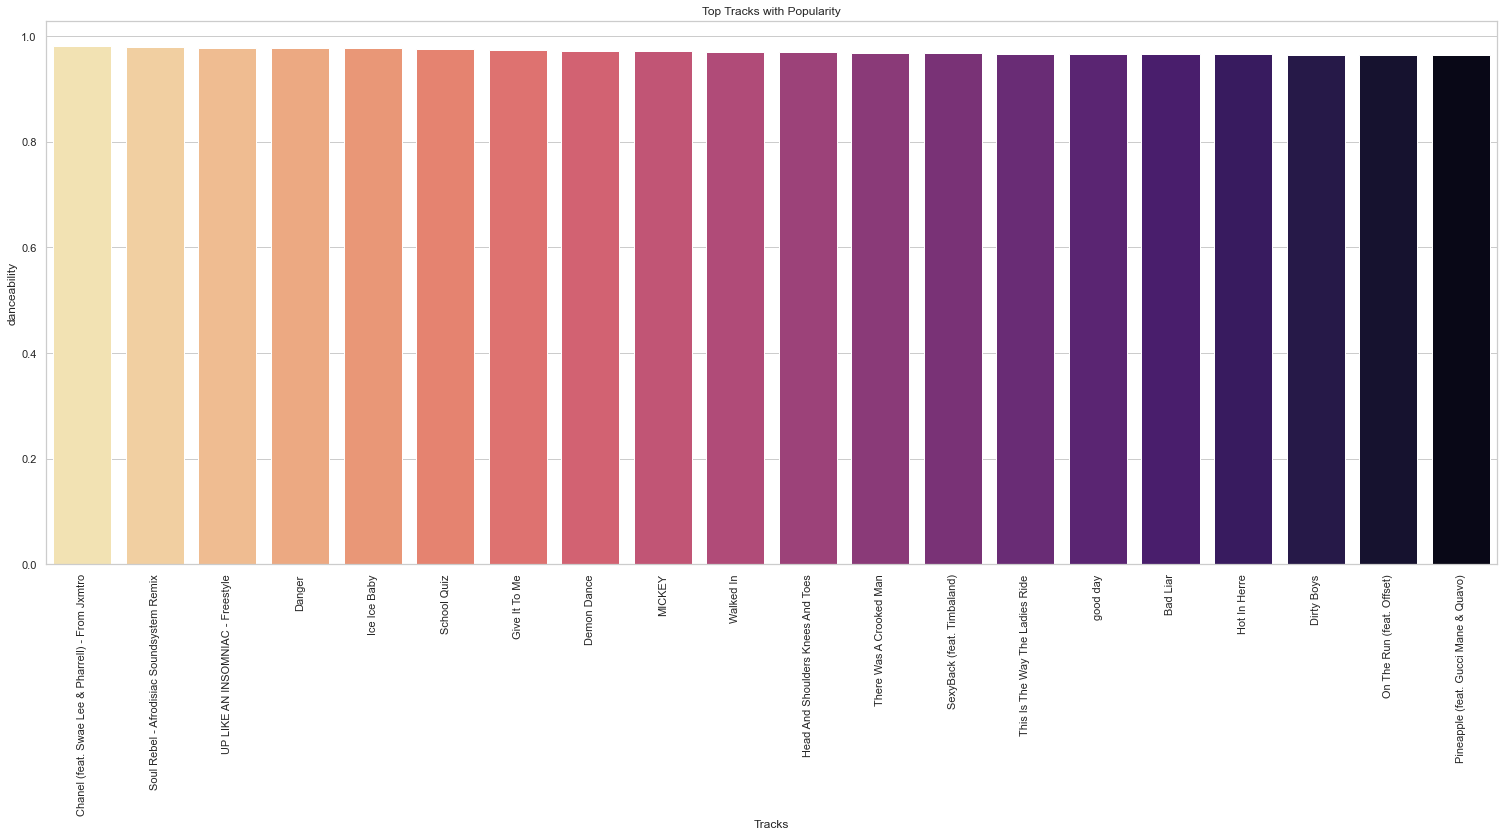

In [24]:
## Top 20 songs by energy
plt.figure(figsize=(26, 10))
sns.set(style="whitegrid")
x = df2.groupby("Song_name")["danceability"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x, palette='magma_r')
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('danceability')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

### From above observation we conclude that the  song name Sol Clap and Go girl have more enerigzed song with energy index 1.

False


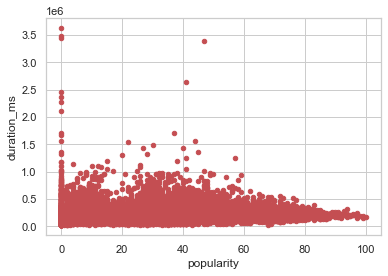

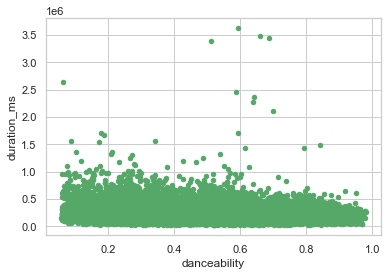

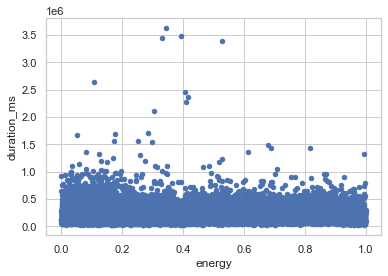

In [25]:
ax1 = df2.plot(kind='scatter', x='popularity', y='duration_ms', color='r')    
ax2 = df2.plot(kind='scatter', x='danceability', y='duration_ms', color='g')    
ax3 = df2.plot(kind='scatter', x='energy', y='duration_ms', color='b')

print(ax1 == ax2 == ax3)  # True

## Not much but yes! some song shows linear relationship with duration. specially energy songs shows strong relation

# MODEL BUILDING

## First we build model using cosine similarity score.

# COSINE SIMILARITY

### Data preparation.

In [26]:
## For similarity based model we only choosed catagorical columns i.e geners and artist name
df3=df2[['genre','artist_name','Song_name','track_id']]
df3.head()

,genre,artist_name,Song_name,track_id
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK


In [27]:
df3.shape

(35087, 4)

In [28]:
## Cleaning of the text
df3['artist_name']=df3['artist_name'].apply(lambda x:x.replace('&',''))
df3['artist_name']=df3['artist_name'].apply(lambda x:x.replace('-',''))
df3['artist_name']=df3['artist_name'].apply(lambda x:x.replace('"',''))
df3['artist_name']=df3['artist_name'].apply(lambda x:x.replace('.',''))
df3['artist_name']=df3['artist_name'].apply(lambda x:x.replace('+',''))
df3['Song_name']=df3['Song_name'].apply(lambda x:x.replace("'",""))

In [29]:
df3.head()

,genre,artist_name,Song_name,track_id
0,Movie,Henri Salvador,Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV
1,Movie,Martin les fées,Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP
2,Movie,Joseph Williams,Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK


In [30]:
## Now convert text into lower case
df3['artist_name']=df3['artist_name'].apply(lambda x:x.lower())
df3['genre']=df3['genre'].apply(lambda x:x.lower())
df3.head()

,genre,artist_name,Song_name,track_id
0,movie,henri salvador,Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV
1,movie,martin les fées,Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP
2,movie,joseph williams,Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy
3,movie,henri salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf
4,movie,fabien nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK


In [31]:
## Converting text into list 
df3['genre']=df3['genre'].apply(lambda x:x.split())
df3['artist_name']=df3['artist_name'].apply(lambda x:x.split())
df3.head()

,genre,artist_name,Song_name,track_id
0,[movie],"[henri, salvador]",Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV
1,[movie],"[martin, les, fées]",Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP
2,[movie],"[joseph, williams]",Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy
3,[movie],"[henri, salvador]",Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf
4,[movie],"[fabien, nataf]",Ouverture,0IuslXpMROHdEPvSl1fTQK


####  we created Tags columns with the additon of genere and artist_name

In [32]:
df3['Tags']=df3['genre']+df3['artist_name']
df3.head()

,genre,artist_name,Song_name,track_id,Tags
0,[movie],"[henri, salvador]",Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,"[movie, henri, salvador]"
1,[movie],"[martin, les, fées]",Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,"[movie, martin, les, fées]"
2,[movie],"[joseph, williams]",Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,"[movie, joseph, williams]"
3,[movie],"[henri, salvador]",Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,"[movie, henri, salvador]"
4,[movie],"[fabien, nataf]",Ouverture,0IuslXpMROHdEPvSl1fTQK,"[movie, fabien, nataf]"


In [33]:
## Converting list into string
df3['Tags']=df3['Tags'].apply(lambda x:" ".join(x))
df3.head()

,genre,artist_name,Song_name,track_id,Tags
0,[movie],"[henri, salvador]",Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,movie henri salvador
1,[movie],"[martin, les, fées]",Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,movie martin les fées
2,[movie],"[joseph, williams]",Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,movie joseph williams
3,[movie],"[henri, salvador]",Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,movie henri salvador
4,[movie],"[fabien, nataf]",Ouverture,0IuslXpMROHdEPvSl1fTQK,movie fabien nataf


In [34]:
df3.head()

,genre,artist_name,Song_name,track_id,Tags
0,[movie],"[henri, salvador]",Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,movie henri salvador
1,[movie],"[martin, les, fées]",Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,movie martin les fées
2,[movie],"[joseph, williams]",Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,movie joseph williams
3,[movie],"[henri, salvador]",Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,movie henri salvador
4,[movie],"[fabien, nataf]",Ouverture,0IuslXpMROHdEPvSl1fTQK,movie fabien nataf


### Text Vectoraization

In [35]:
cv = CountVectorizer()
vectors = cv.fit_transform(df3['Tags'])

In [36]:
vectors.shape

(35087, 7971)

In [37]:
vectors[0]

<1x7971 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [38]:
similarity=cosine_similarity(vectors)

In [39]:
song_index=df3[df3['Song_name']=='Perdu davance (par Gad Elmaleh)'].index[0]
song_index

1

In [40]:
df3.iloc[10000]

genre                           [rap]
artist_name             [juice, wrld]
Song_name                 Ill Be Fine
track_id       0INehbMZOFPnaPBAjK97i3
Tags                   rap juice wrld
Name: 12357, dtype: object

In [41]:
def recommend(songs):
    song_index=df3[df3['Song_name']==songs].index[0]
    distances=similarity[song_index]
    songs_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:11]
    
    for i in songs_list:
        print(df3.iloc[i[0]].Song_name)

In [42]:
result1=recommend('This Is a Rebel Song')

Godrics Hollow Graveyard
Farewell to Dobby
Harrys Sacrifice
The Danish Girl
Snape to Malfoy Manor
At The Burrow
Ron Leaves
The Kings Speech
Snapes Demise
Voldemorts End


# Nearest neighoubr

In [43]:
df4=df2.drop(['genre','artist_name','Song_name'],axis=1)
df4.head()

,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,Major,0.0525,166.969,0.814
1,0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,Major,0.0395,171.758,0.227
4,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,Major,0.0456,140.576,0.390


In [44]:
df4['mode'].value_counts()

Major    22886
Minor    12201
Name: mode, dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [46]:
df4['mode']=le.fit_transform(df4['mode'])

In [47]:
df4.head()

,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0,0.0525,166.969,0.814
1,0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,1,0.0868,174.003,0.816
2,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,1,0.0362,99.488,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0,0.0395,171.758,0.227
4,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0,0.0456,140.576,0.390


## Nearest Neighbors with Ball Tree

In [48]:
from sklearn.neighbors import NearestNeighbors

In [49]:
df4.drop(['track_id'],axis=1,inplace=True)

In [50]:
df4.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0,0.0525,166.969,0.814
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,1,0.0868,174.003,0.816
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,1,0.0362,99.488,0.368
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0,0.0395,171.758,0.227
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0,0.0456,140.576,0.390


In [51]:
songs_Recomand = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(df4)

In [52]:
#Get the distances and indices: the indices to pull the recommended neighbors, and the distances for evaluation later
distances, indices = songs_Recomand.kneighbors(df4)

In [53]:
distances[1]

array([  0.        ,  33.17024175,  36.43859109,  74.54715232,
        75.21725009,  83.82115492, 113.47473607, 115.12488679,
       157.87275887, 163.07622611, 164.78238472])

In [54]:
def recommend_songs(song=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(df.iloc[id]["Song_name"])
    if song:
        recommendations = []
        found_id =df[df['Song_name']==song].index[0]
        for id in indices[found_id][1:]:
            recommendations.append((df.iloc[id]["Song_name"], df.iloc[id]["artist_name"]))
            print(df.iloc[id]["Song_name"], df.iloc[id]["artist_name"])
        return recommendations

In [55]:
results2 = recommend_songs("This Is a Rebel Song")

Mud on the Tires Brad Paisley
Shawty Natural Vibrations
Broken Hearted Melody Sarah Vaughan
Seven Stars Air
Differences Ginuwine
What's Luv? (feat. Ja-Rule & Ashanti) Fat Joe
Watch Me Kick Kimbo Children's Music
Ballroom Blitz Sweet
Ma Femme Henri Salvador
Good Vibes - Dub Rebelution


## Nearest Neighbors with KD Tree

In [56]:
songs_nn2 = NearestNeighbors(n_neighbors=11, algorithm='kd_tree', leaf_size = 40, metric = 'euclidean').fit(df4)

In [57]:
distances2, indices2 = songs_nn2.kneighbors(df4)

In [58]:
def recommend_songs_2(song=None,id=None):
    if id:
        for id in indices2[id][1:]:
            print(df.iloc[id]["Song_name"])
    if song:
        recommendations = []
        found_id =df[df['Song_name']==song].index[0]
        for id in indices2[found_id][1:]:
            recommendations.append((df.iloc[id]["Song_name"], df.iloc[id]["artist_name"]))
            print(df.iloc[id]["Song_name"], df.iloc[id]["artist_name"])
        return recommendations

In [59]:
results3 = recommend_songs_2("This Is a Rebel Song")

Mud on the Tires Brad Paisley
Shawty Natural Vibrations
Broken Hearted Melody Sarah Vaughan
Seven Stars Air
Differences Ginuwine
What's Luv? (feat. Ja-Rule & Ashanti) Fat Joe
Watch Me Kick Kimbo Children's Music
Ballroom Blitz Sweet
Ma Femme Henri Salvador
Good Vibes - Dub Rebelution


# K-Means

In [60]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, ))])
X = df4.select_dtypes(np.number)
cluster_pipeline.fit(X)
df4['cluster'] = cluster_pipeline.predict(X)

In [61]:
df4 = df4.drop(columns=['duration_ms','popularity'])

In [62]:
songs_nn3 = NearestNeighbors(n_neighbors=11, algorithm='kd_tree', leaf_size = 40, metric = 'euclidean').fit(df4)

In [63]:
distances3, indices3 = songs_nn3.kneighbors(df4)

In [64]:
def recommend_songs_3(song=None):
        recommendations = []
        found_id =df[df['Song_name']==song].index[0]
        for id in indices3[found_id][1:]:
            recommendations.append((df.iloc[id]["Song_name"], df.iloc[id]["artist_name"]))
            print(df.iloc[id]["Song_name"], df.iloc[id]["artist_name"])
        return recommendations

In [65]:
results4 = recommend_songs_3("This Is a Rebel Song")

Prequel To The Sequel Between The Buried And Me
When It Was Wrong The California Honeydrops
Yo vengo aqui Compay Segundo
Mandatory Sterilization Dan Cummins
Signos (SEP7IMO DIA) Soda Stereo
IDOL BTS
Trollmors vaggsång Jan Johansson
Yellow Eyes Between The Buried And Me
Take It Slow Charlotte Dos Santos
Road Block (feat. Racquel Jones) - Thievery Remix Thievery Corporation


In [66]:
recommend('This Is a Rebel Song')

Godrics Hollow Graveyard
Farewell to Dobby
Harrys Sacrifice
The Danish Girl
Snape to Malfoy Manor
At The Burrow
Ron Leaves
The Kings Speech
Snapes Demise
Voldemorts End


# Model Evaluations

In [91]:
from tabulate import tabulate

In [99]:
table = [["Godrics Hollow Graveyard",'Mud on the Tires','Mud on the Tires','Prequel To The Sequel'], 
        ["Farewell to Dobby",'Shawty','Shawty','Trollmors vaggsång'], 
        ["Harrys Sacrifice",'Broken Hearted Melody','Broken Hearted Melody','When It Was Wrong'],
        ['The Danish Girl','Seven Stars','Seven Stars','Yo vengo aqui'],
        ['Snape to Malfoy Manor','Differences','Differences','Mandatory Sterilization'],
        ['At The Burrow','Whats Luv?','Whats Luv?','Signos (SEP7IMO DIA)'],
        ['Ron Leaves','Watch Me Kick','Watch Me Kick','IDOL'],
        ['The Kings Speech','Ballroom Blitz','Ballroom Blitz','Yellow Eyes'],
        ['Snapes Demise','Ma Femme','Ma Femme','Take It Slow'],
        ['Voldemorts End','Good Vibes - Dub','Good Vibes - Dub','Road Block (feat. Racquel Jones) - Thievery Remix']] 

#define column names
col_names = ["Cosine Similarity", "KNN With Ball_tree","KNN with KD_tree","K-means"]

#display table
print(tabulate(table, headers=col_names,showindex="always"))

    Cosine Similarity         KNN With Ball_tree     KNN with KD_tree       K-means
--  ------------------------  ---------------------  ---------------------  -------------------------------------------------
 0  Godrics Hollow Graveyard  Mud on the Tires       Mud on the Tires       Prequel To The Sequel
 1  Farewell to Dobby         Shawty                 Shawty                 Trollmors vaggsång
 2  Harrys Sacrifice          Broken Hearted Melody  Broken Hearted Melody  When It Was Wrong
 3  The Danish Girl           Seven Stars            Seven Stars            Yo vengo aqui
 4  Snape to Malfoy Manor     Differences            Differences            Mandatory Sterilization
 5  At The Burrow             Whats Luv?             Whats Luv?             Signos (SEP7IMO DIA)
 6  Ron Leaves                Watch Me Kick          Watch Me Kick          IDOL
 7  The Kings Speech          Ballroom Blitz         Ballroom Blitz         Yellow Eyes
 8  Snapes Demise             Ma Femme         

In [100]:
mean_distance3 = distances3.mean()

In [102]:
mean_distance3

0.891492059721874

In [103]:
mean_distance = distances.mean()
mean_distance

317.32469149171095

In [104]:
mean_distance2=distances2.mean()
mean_distance2

317.32469149171095

In [106]:
Table=[['Knn with Ball_tree',317.3246],
      ['KNN with KD_tree',317.324],
      ['K-mean',0.8914]]

#define column names
col_names = ["Models",'Mean_distance_score']

#display table
print(tabulate(Table, headers=col_names,showindex="always",tablefmt="fancy_grid"))

╒════╤════════════════════╤═══════════════════════╕
│    │ Models             │   Mean_distance_score │
╞════╪════════════════════╪═══════════════════════╡
│  0 │ Knn with Ball_tree │              317.325  │
├────┼────────────────────┼───────────────────────┤
│  1 │ KNN with KD_tree   │              317.324  │
├────┼────────────────────┼───────────────────────┤
│  2 │ K-mean             │                0.8914 │
╘════╧════════════════════╧═══════════════════════╛


## Conclusion 

## From above result the Mean_distance_score of both knn with Ball_tree and KNN with kd_tree is large i.e 317.25 as compare to the k-mean i.e 0.8914 it means k-mean gives more similar song as comapre to others .

## While the cosimilarity model using geners is also right as it depends on genere and artist_name .

## So that we used either cosine similarity or k-mean model for deployment.